In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/historical-data-on-the-trading-of-cryptocurrencies/crypto_tradinds.csv


In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool

df = pd.read_csv('../input/historical-data-on-the-trading-of-cryptocurrencies/crypto_tradinds.csv')

df.head()

,trade_date,volume,price_usd,price_btc,market_cap,capitalization_change_1_day,USD_price_change_1_day,BTC_price_change_1_day,crypto_name,crypto_type,ticker,max_supply,site_url,github_url,minable,platform_name,industry_name
0,2016-01-01,36278900.0,434.33,1.0,6.529300e+09,0.000000,0.000000,0.0,Bitcoin,0.0,BTC,21000000.0,https://bitcoin.org/,https://github.com/bitcoin/,1.0,NaN,Proof of Work (PoW)
1,2016-01-02,30096600.0,433.44,1.0,6.517390e+09,-0.001824,-0.002049,0.0,Bitcoin,0.0,BTC,21000000.0,https://bitcoin.org/,https://github.com/bitcoin/,1.0,NaN,Proof of Work (PoW)
2,2016-01-03,39633800.0,430.01,1.0,6.467430e+09,-0.007666,-0.007913,0.0,Bitcoin,0.0,BTC,21000000.0,https://bitcoin.org/,https://github.com/bitcoin/,1.0,NaN,Proof of Work (PoW)
3,2016-01-04,38477500.0,433.09,1.0,6.515713e+09,0.007466,0.007163,0.0,Bitcoin,0.0,BTC,21000000.0,https://bitcoin.org/,https://github.com/bitcoin/,1.0,NaN,Proof of Work (PoW)
4,2016-01-05,34522600.0,431.96,1.0,6.500393e+09,-0.002351,-0.002609,0.0,Bitcoin,0.0,BTC,21000000.0,https://bitcoin.org/,https://github.com/bitcoin/,1.0,NaN,Proof of Work (PoW)


* **It is helpful to see what we are working with. The next section involves viewing the attributes of the dataset.**

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610873 entries, 0 to 1610872
Data columns (total 17 columns):
trade_date                     1610873 non-null object
volume                         1610873 non-null float64
price_usd                      1610873 non-null float64
price_btc                      1610873 non-null float64
market_cap                     1610873 non-null float64
capitalization_change_1_day    1610873 non-null float64
USD_price_change_1_day         1610873 non-null float64
BTC_price_change_1_day         1610873 non-null float64
crypto_name                    1469224 non-null object
crypto_type                    1469224 non-null float64
ticker                         1469224 non-null object
max_supply                     346085 non-null float64
site_url                       1444492 non-null object
github_url                     1041361 non-null object
minable                        1469224 non-null float64
platform_name                  500852 non-null object

As we can see from the above data, there is some information that is simply not needed. A good example would be the site_url and github_url. Let's remove that now.****

In [25]:
df = df.drop(['site_url', 'github_url','industry_name','capitalization_change_1_day','platform_name', 'minable','BTC_price_change_1_day'], axis=1)


**Upon getting a closer look at our data, we notice that there are NaN values. This would complicate our EDA and so we should replace them**

In [26]:
df.fillna(0)

,trade_date,volume,price_usd,price_btc,market_cap,USD_price_change_1_day,crypto_name,crypto_type,ticker,max_supply
0,2016-01-01,36278900.00,434.33,1.000000,6.529300e+09,0.000000,Bitcoin,0.0,BTC,21000000.0
1,2016-01-02,30096600.00,433.44,1.000000,6.517390e+09,-0.002049,Bitcoin,0.0,BTC,21000000.0
2,2016-01-03,39633800.00,430.01,1.000000,6.467430e+09,-0.007913,Bitcoin,0.0,BTC,21000000.0
3,2016-01-04,38477500.00,433.09,1.000000,6.515713e+09,0.007163,Bitcoin,0.0,BTC,21000000.0
4,2016-01-05,34522600.00,431.96,1.000000,6.500393e+09,-0.002609,Bitcoin,0.0,BTC,21000000.0
...,...,...,...,...,...,...,...,...,...,...
1610868,2020-01-16,2180.65,1.39,0.000159,0.000000e+00,0.007246,Saga,1.0,SGA,0.0
1610869,2020-01-17,6008.09,1.40,0.000157,0.000000e+00,0.007194,Saga,1.0,SGA,0.0
1610870,2020-01-18,2287.18,1.39,0.000155,0.000000e+00,-0.007143,Saga,1.0,SGA,0.0
1610871,2020-01-19,25423.67,1.39,0.000160,0.000000e+00,0.000000,Saga,1.0,SGA,0.0


In [27]:
df.describe()

,volume,price_usd,price_btc,market_cap,USD_price_change_1_day,crypto_type,max_supply
count,1.610873e+06,1.610873e+06,1.610873e+06,1.610873e+06,1.610873e+06,1.469224e+06,3.460850e+05
mean,1.857782e+07,9.690825e+01,1.781320e-02,1.493565e+08,9.376302e+02,5.125597e-01,5.391931e+10
std,4.672035e+08,5.274448e+03,1.042302e+00,3.492802e+09,8.153038e+04,4.998424e-01,6.335534e+11
min,0.000000e+00,1.150000e-11,0.000000e+00,0.000000e+00,-9.999999e-01,0.000000e+00,1.250000e+03
25%,2.440000e+02,1.734000e-03,3.193234e-07,4.141300e+04,-5.346951e-02,0.000000e+00,2.900000e+07
50%,8.986000e+03,1.436000e-02,2.579152e-06,6.489000e+05,0.000000e+00,1.000000e+00,1.136029e+08
75%,1.762340e+05,1.316260e-01,2.391174e-05,5.690525e+06,4.322213e-02,1.000000e+00,1.000000e+09
max,5.768716e+10,2.300740e+06,5.953689e+02,3.265025e+11,9.899999e+06,1.000000e+00,1.000000e+13


Next, it is helpful to find the correlation between the variables. This will help us focus on the important ones****

In [28]:
df.corr()

,volume,price_usd,price_btc,market_cap,USD_price_change_1_day,crypto_type,max_supply
volume,1.000000,0.019889,0.011760,0.604395,-0.000457,-0.016632,-0.004432
price_usd,0.019889,1.000000,0.762095,0.033852,-0.000193,-0.014997,-0.006829
price_btc,0.011760,0.762095,1.000000,0.020904,-0.000140,-0.013166,-0.007722
market_cap,0.604395,0.033852,0.020904,1.000000,-0.000492,-0.040616,-0.003939
USD_price_change_1_day,-0.000457,-0.000193,-0.000140,-0.000492,1.000000,-0.005309,0.000745
crypto_type,-0.016632,-0.014997,-0.013166,-0.040616,-0.005309,1.000000,0.044090
max_supply,-0.004432,-0.006829,-0.007722,-0.003939,0.000745,0.044090,1.000000


**Now we plot this correlation in a correlation matrix using matplotlib and seaborn**

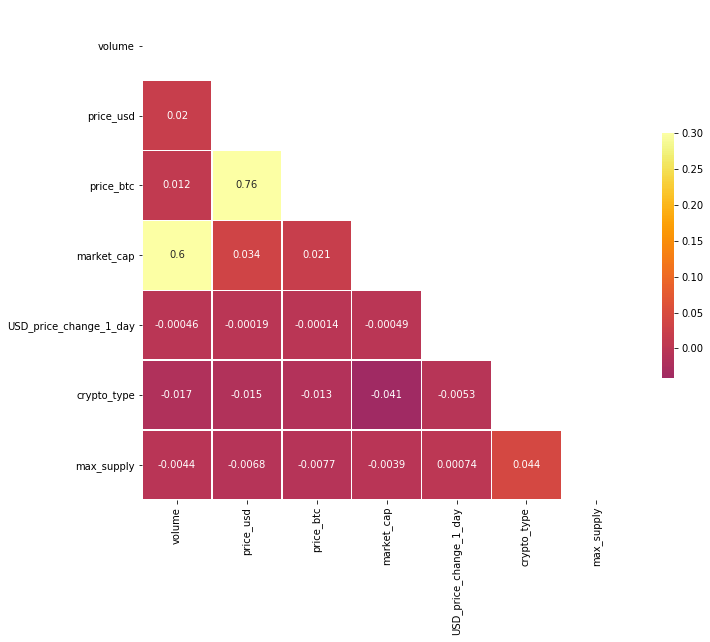

In [29]:
from string import ascii_letters
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='inferno', annot= True, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

**Clearly the market cap is the most correlated variable with the price**

Lets see what the columns are in order to plot them

In [30]:
df.columns

Index(['trade_date', 'volume', 'price_usd', 'price_btc', 'market_cap',
       'USD_price_change_1_day', 'crypto_name', 'crypto_type', 'ticker',
       'max_supply'],
      dtype='object')

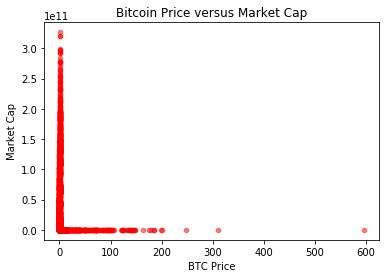

In [31]:
# Scatter Plot 
# x = price, y = market cap
df.plot(kind='scatter', x='price_btc', y='market_cap',alpha = 0.5,color = 'red')
plt.xlabel('BTC Price')              # label = name of label
plt.ylabel('Market Cap')
plt.title('Bitcoin Price versus Market Cap')            # title = title of plot
plt.show()

**This confirms that the lower the market cap, the higher the cryptocurrency price**

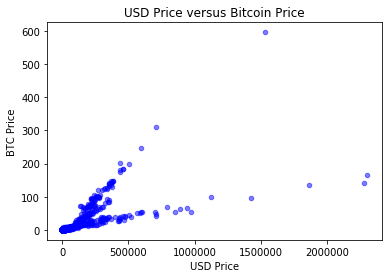

In [32]:
# Scatter Plot 
# x = price, y = market cap
df.plot(kind='scatter', x='price_usd', y='price_btc',alpha = 0.5,color = 'blue')
plt.xlabel('USD Price')              # label = name of label
plt.ylabel('BTC Price')
plt.title('USD Price versus Bitcoin Price')            # title = title of plot
plt.show()

**This confirms that the BTC Price is highly correlated with the USD Price**

In [35]:
# Plotting a Histogram
newdf = df[['crypto_name','price_usd']].groupby('price_usd').sum()
newdf.crypto_name.value_counts().nlargest(10).plot(kind='bar', figsize=(10,5))
plt.title('Cryptocurrencies')
plt.ylabel('Number of Cryptocurrencies')
plt.xlabel('Name of Cryptocurrencies')

KeyError: 'price_usd'